# Attempt 4 

### Getting the data

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from ast import literal_eval
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost
from matplotlib import pyplot as plt

### Loading the data

In [2]:
df = pd.read_csv("C:/Users/micha/Desktop/FinalProject/largerdata2.csv")
difficulties_df = pd.read_csv("C:/Users/micha/Desktop/FinalProject/HoldFeature2016RightHand.csv")
df

,problem_id,url,start,mid,end,grade,user_grade,is_benchmark,repeats,problem_type,is_master,setter_id,setter_nickname,setter_firstname,setter_lastname,setter_city,setter_country,setter_profile_image_url,setter_can_share_data
0,21995,https://moonboard.com/Problems/View/21995/slowly,"[[7, 4], [4, 5]]","[[7, 7], [4, 9], [6, 12], [8, 15]]","[[6, 17]]",6B,6B+,False,37,NaN,False,4dce5d91-ba13-4e03-bace-ca7d5b81022d,redflavor,jung,HOJUN,cheongju,REPUBLIK OF KOREA,/Content/Account/Images/default-profile.png?63...,True
1,23406,https://moonboard.com/Problems/View/23406/wu-%...,"[[10, 4]]","[[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...","[[4, 17]]",6B,6B+,False,36,NaN,False,ACEAB249-E995-4EC0-A4E0-C7A3AAC74652,shinya okada,shinya,okada,kyoto,JAP,/Content/Account/Images/default-profile.png?63...,True
2,20712,https://moonboard.com/Problems/View/20712/warm...,"[[10, 4]]","[[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...","[[3, 17]]",6B,6B+,False,28,NaN,False,46A085A4-78F2-4D5C-82CB-97D2E29E1074,Ryan Johnson,Ryan,Johnson,Chattanooga,USA,/Content/Account/Images/default-profile.png?63...,True
3,312109,https://moonboard.com/Problems/View/312109/squ...,"[[2, 4], [3, 2]]","[[5, 8], [2, 10], [3, 12], [1, 14]]","[[6, 17]]",6B,6A+,False,21,NaN,False,66807cc9-36fa-4cdd-9fad-9f1f684d3359,Dave Scott,Dave,Scott,Rome,Italy,/Content/Account/Images/default-profile.png?63...,True
4,19928,https://moonboard.com/Problems/View/19928/high...,"[[7, 4]]","[[7, 7], [5, 9], [6, 12], [4, 15]]","[[6, 17]]",6B,NaN,False,15,NaN,False,7212FB0B-1D51-46BB-B985-E394AA8C6634,Brett Duffield,Brett,Duffield,Gillingham,UK,/Content/Account/Images/default-profile.png?63...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,308125,https://moonboard.com/Problems/View/308125/sat...,"[[3, 4], [6, 3]]","[[6, 7], [10, 4], [7, 12], [5, 15]]","[[8, 17], [6, 17]]",8A+,NaN,False,4,NaN,False,7e33d91e-dd5a-4682-8037-857a962e37c0,Gus,August,Ruehr,Bellevue,WASHINGTON,/Content/Account/Images/default-profile.png?63...,True
725,82224,https://moonboard.com/Problems/View/82224/blac...,"[[9, 4]]","[[8, 8], [4, 13]]","[[7, 17]]",8B,8B,True,19,NaN,False,491FD2E9-AC19-4663-B5E9-34728B3F0363,Daniel Woods,Daniel,Woods,Boulder,United States,/Content/Account/Images/default-profile.png?63...,True
726,353853,https://moonboard.com/Problems/View/353853/magnus,"[[2, 4]]","[[6, 14], [4, 8], [2, 12]]","[[3, 17]]",8B,NaN,False,5,NaN,False,3cb0ed8f-63cf-445d-a9df-5d809532170b,d1111,Ditte,Oláh,Budapest,Hungary,/Content/Account/Images/default-profile.png?63...,True
727,351811,https://moonboard.com/Problems/View/351811/scream,"[[1, 3], [3, 2]]","[[5, 7], [6, 13], [2, 9]]","[[2, 17]]",8B,NaN,False,4,NaN,False,70bf79ea-65be-4251-8c0d-5f737a5cabff,Setherbee.sethington,Seth,England,Guelph,Canada,/Content/Account/Images/default-profile.png?63...,True


### Removing redundunt coluns

In [3]:
desired_columns = ['start', 'mid', 'end', 'grade']
df = df[desired_columns]
df

,start,mid,end,grade
0,"[[7, 4], [4, 5]]","[[7, 7], [4, 9], [6, 12], [8, 15]]","[[6, 17]]",6B
1,"[[10, 4]]","[[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...","[[4, 17]]",6B
2,"[[10, 4]]","[[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...","[[3, 17]]",6B
3,"[[2, 4], [3, 2]]","[[5, 8], [2, 10], [3, 12], [1, 14]]","[[6, 17]]",6B
4,"[[7, 4]]","[[7, 7], [5, 9], [6, 12], [4, 15]]","[[6, 17]]",6B
...,...,...,...,...
724,"[[3, 4], [6, 3]]","[[6, 7], [10, 4], [7, 12], [5, 15]]","[[8, 17], [6, 17]]",8A+
725,"[[9, 4]]","[[8, 8], [4, 13]]","[[7, 17]]",8B
726,"[[2, 4]]","[[6, 14], [4, 8], [2, 12]]","[[3, 17]]",8B
727,"[[1, 3], [3, 2]]","[[5, 7], [6, 13], [2, 9]]","[[2, 17]]",8B


### Checking for null values

In [4]:
print(df[['start', 'mid', 'end', 'grade']].isnull().sum())

start    0
mid      0
end      0
grade    0
dtype: int64


### Checking data types of the columns

In [5]:
print(df[['start', 'mid', 'end', 'grade']].dtypes)

start    object
mid      object
end      object
grade    object
dtype: object


### Creating functions to preprocess the data 

In [6]:
from ast import literal_eval

def custom_sort_with_new_condition(coordinates):
    sorted_by_y = sorted(coordinates, key=lambda x: x[1])

    if len(sorted_by_y) > 2 and sorted_by_y[0][1] == sorted_by_y[1][1]:
        third_x = sorted_by_y[2][0]
        sorted_by_y[:2] = sorted(sorted_by_y[:2], key=lambda x: abs(x[0] - third_x))

    i = 1 
    while i < len(sorted_by_y) - 1:
        start_i = i
        while i < len(sorted_by_y) - 1 and sorted_by_y[i][1] == sorted_by_y[i + 1][1]:
            i += 1

        if i > start_i:
            previous_x = sorted_by_y[start_i - 1][0]
            sorted_by_y[start_i:i + 1] = sorted(sorted_by_y[start_i:i + 1], key=lambda x: abs(x[0] - previous_x))

        i += 1

    return sorted_by_y

# Apply literal_eval to convert string representations of lists into actual lists
df['start'] = df['start'].apply(literal_eval)
df['mid'] = df['mid'].apply(literal_eval)
df['end'] = df['end'].apply(literal_eval)

# Combine 'start', 'mid', and 'end' into 'sorted_combined' and apply custom sorting
df['sorted_combined'] = df.apply(lambda row: custom_sort_with_new_condition(row['start'] + row['mid'] + row['end']), axis=1)

df


C:\Users\micha\AppData\Local\Temp\ipykernel_26356\29862686.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['start'].apply(literal_eval)
C:\Users\micha\AppData\Local\Temp\ipykernel_26356\29862686.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mid'] = df['mid'].apply(literal_eval)
C:\Users\micha\AppData\Local\Temp\ipykernel_26356\29862686.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,start,mid,end,grade,sorted_combined
0,"[[7, 4], [4, 5]]","[[7, 7], [4, 9], [6, 12], [8, 15]]","[[6, 17]]",6B,"[[7, 4], [4, 5], [7, 7], [4, 9], [6, 12], [8, ..."
1,"[[10, 4]]","[[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...","[[4, 17]]",6B,"[[10, 4], [9, 6], [6, 7], [7, 9], [5, 11], [6,..."
2,"[[10, 4]]","[[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...","[[3, 17]]",6B,"[[10, 4], [5, 6], [6, 8], [4, 9], [4, 11], [2,..."
3,"[[2, 4], [3, 2]]","[[5, 8], [2, 10], [3, 12], [1, 14]]","[[6, 17]]",6B,"[[3, 2], [2, 4], [5, 8], [2, 10], [3, 12], [1,..."
4,"[[7, 4]]","[[7, 7], [5, 9], [6, 12], [4, 15]]","[[6, 17]]",6B,"[[7, 4], [7, 7], [5, 9], [6, 12], [4, 15], [6,..."
...,...,...,...,...,...
724,"[[3, 4], [6, 3]]","[[6, 7], [10, 4], [7, 12], [5, 15]]","[[8, 17], [6, 17]]",8A+,"[[6, 3], [3, 4], [10, 4], [6, 7], [7, 12], [5,..."
725,"[[9, 4]]","[[8, 8], [4, 13]]","[[7, 17]]",8B,"[[9, 4], [8, 8], [4, 13], [7, 17]]"
726,"[[2, 4]]","[[6, 14], [4, 8], [2, 12]]","[[3, 17]]",8B,"[[2, 4], [4, 8], [2, 12], [6, 14], [3, 17]]"
727,"[[1, 3], [3, 2]]","[[5, 7], [6, 13], [2, 9]]","[[2, 17]]",8B,"[[3, 2], [1, 3], [5, 7], [2, 9], [6, 13], [2, ..."


In [7]:
import numpy as np
import ast 

def create_difficulty_matrix(df, difficulties_df):
    # Create a mapping from (X, Y) coordinates to difficulty values
    hold_difficulties = {(row.X_coord, row.Y_coord): row.Difficulties for row in difficulties_df.itertuples()}
    
    # Generate sorted coordinates based on the mapping and create the coord_to_index mapping
    sorted_coords = sorted(hold_difficulties)
    coord_to_index = {coord: index for index, coord in enumerate(sorted_coords)}

    # Initialize the difficulty matrix
    difficulty_matrix = np.zeros((len(df), len(coord_to_index)))
    
    # Fill in the difficulty matrix
    for index, row in df.iterrows():
        all_holds = row['sorted_combined']
        for hold in all_holds:
            hold_tuple = tuple(hold)
            if hold_tuple in hold_difficulties:
                position_index = coord_to_index[hold_tuple]
                difficulty_matrix[index, position_index] = hold_difficulties[hold_tuple]
                
    return difficulty_matrix, coord_to_index

In [8]:
difficulty_matrix, coord_to_index = create_difficulty_matrix(df, difficulties_df)

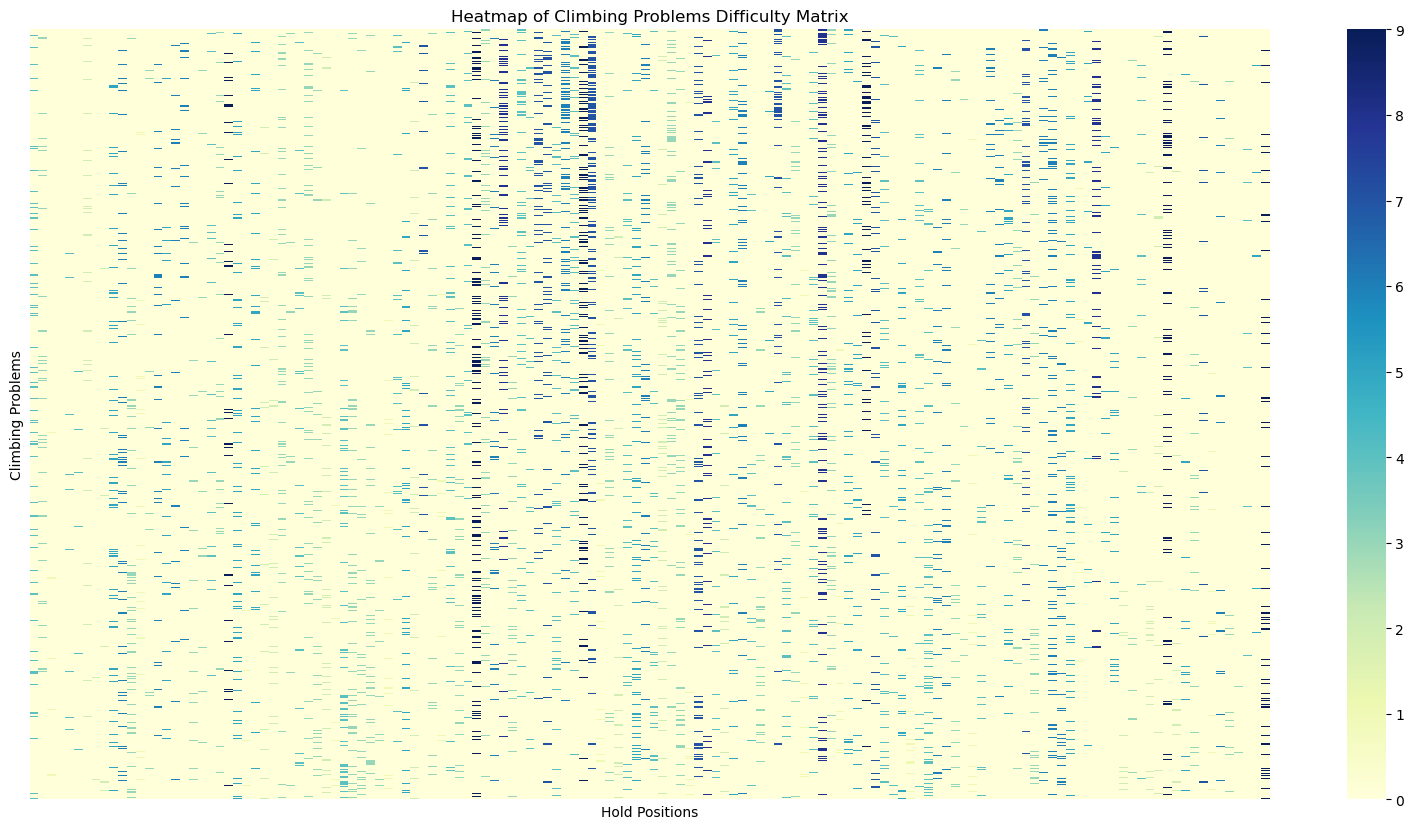

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(difficulty_matrix, cmap="YlGnBu", cbar=True, xticklabels=False, yticklabels=False)
plt.title('Heatmap of Climbing Problems Difficulty Matrix')
plt.xlabel('Hold Positions')
plt.ylabel('Climbing Problems')
plt.show()

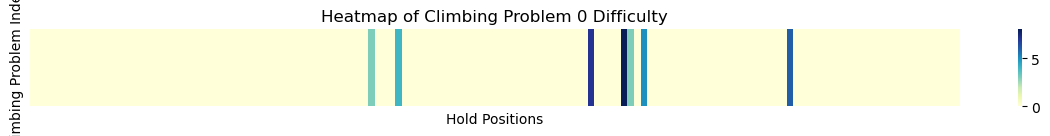

In [10]:
climbing_problem_index = 0

# Extract the difficulty array for the selected climbing problem
single_climbing_problem_difficulty = difficulty_matrix[climbing_problem_index, :].reshape(1, -1)

# Create a heatmap for the single climbing problem's difficulty array
plt.figure(figsize=(15, 1))  # Adjust the figure size as needed
sns.heatmap(single_climbing_problem_difficulty, cmap="YlGnBu", cbar=True, xticklabels=False, yticklabels=False)
plt.title(f'Heatmap of Climbing Problem {climbing_problem_index} Difficulty')
plt.xlabel('Hold Positions')
plt.ylabel('Climbing Problem Index')
plt.show()

To summarise, this code helps to quickly understand the general distribution of difficulty across the holds and issues by visualising the climbing problem difficulty data. It also helps to discover patterns, such as which parts of the wall are consistently harder.

### Define the calculate_aggregated_difficulties function

In [11]:
import numpy as np

def calculate_aggregated_difficulties(difficulty_matrix):
    # Calculate the average difficulty for each problem (row), ignoring zero values
    avg_difficulties = np.nanmean(np.where(difficulty_matrix == 0, np.nan, difficulty_matrix), axis=1)
    
    # Calculate the maximum difficulty for each problem
    max_difficulties = np.max(difficulty_matrix, axis=1)
    
    # Calculate the minimum difficulty for each problem, excluding zeros
    min_difficulties = np.min(np.where(difficulty_matrix != 0, difficulty_matrix, np.inf), axis=1)
    
    # Replace inf with np.nan for the min_difficulties if there are all zero values in a row
    min_difficulties = np.where(min_difficulties == np.inf, np.nan, min_difficulties)
    
    return avg_difficulties, max_difficulties, min_difficulties

In this revised function:

avg_difficulties calculates the mean difficulty per problem, reflecting the overall challenge of the problem.
max_difficulties finds the highest difficulty value per problem, indicating the hardest move in each problem.
min_difficulties initially sets the difficulty to np.inf where the difficulty is 0 (to ignore these when calculating the minimum), then calculates the minimum value per problem, and finally replaces np.inf with 0 (or np.nan) to handle rows where all values are zero, indicating no difficulty or unattempted holds.
This function now efficiently computes the aggregate statistics for each climbing problem, with consideration for rows that could be entirely zero, which could be relevant in datasets representing climbing problems with varying numbers of holds used

### Calculate the aggregated difficulties

In [12]:
avg_difficulties, max_difficulties, min_difficulties = calculate_aggregated_difficulties(difficulty_matrix)

### Visualization of Average Difficulties

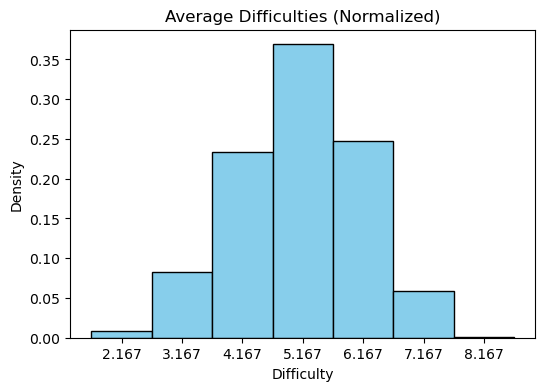

In [13]:
import matplotlib.pyplot as plt

avg_difficulty_bins = np.arange(min(avg_difficulties)-0.5, max(avg_difficulties)+1, 1)

# Plot the histogram for average difficulties
plt.figure(figsize=(6, 4))
plt.hist(avg_difficulties, bins=avg_difficulty_bins, color='skyblue', edgecolor='black', density=True)
plt.title('Average Difficulties (Normalized)')
plt.xlabel('Difficulty')
plt.ylabel('Density')
plt.xticks(np.arange(min(avg_difficulties), max(avg_difficulties)+1, 1))
plt.show()

### Visualization of Maximum Difficulties

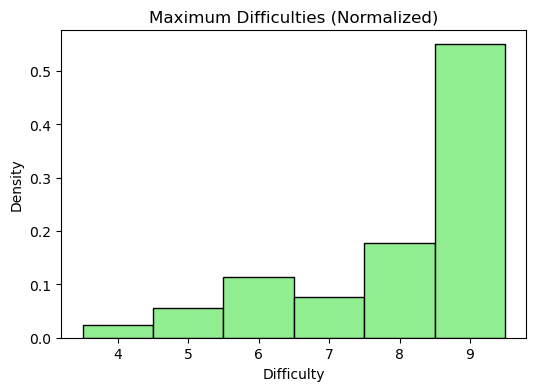

In [14]:
# Define bins for the histogram
max_difficulty_bins = np.arange(min(max_difficulties)-0.5, max(max_difficulties)+1, 1)

# Plot the histogram for maximum difficulties
plt.figure(figsize=(6, 4))
plt.hist(max_difficulties, bins=max_difficulty_bins, color='lightgreen', edgecolor='black', density=True)
plt.title('Maximum Difficulties (Normalized)')
plt.xlabel('Difficulty')
plt.ylabel('Density')
plt.xticks(np.arange(min(max_difficulties), max(max_difficulties)+1, 1))
plt.show()

### Visualization of Non-Zero Minimum Difficulties

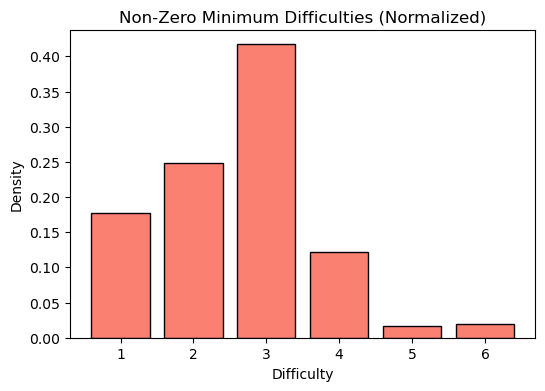

In [15]:
# Filter out zero and infinite values from min_difficulties
valid_min_difficulties = min_difficulties[(min_difficulties > 0) & (min_difficulties != np.inf)]

# Check if there are any non-zero minimum difficulties to plot
if valid_min_difficulties.size > 0:
    # Define bins for the histogram
    min_difficulty_bins = np.arange(min(valid_min_difficulties)-0.5, max(valid_min_difficulties)+1, 1)

    # Plot the histogram for non-zero minimum difficulties
    plt.figure(figsize=(6, 4))
    plt.hist(valid_min_difficulties, bins=min_difficulty_bins, color='salmon', edgecolor='black', density=True, rwidth=0.8)
    plt.title('Non-Zero Minimum Difficulties (Normalized)')
    plt.xlabel('Difficulty')
    plt.ylabel('Density')
    plt.xticks(np.arange(min(valid_min_difficulties), max(valid_min_difficulties)+1, 1))
    plt.show()
else:
    print("No non-zero minimum difficulties found. Check the calculation or data.")

Dominant Difficulty: The most common minimum difficulty level among the climbing problems is 3. A significant majority of problems have at least one hold with this difficulty level, which might suggest that difficulty 3 is a baseline challenge in these climbing routes.

Distribution Shape: The distribution of minimum difficulties is not uniform. Difficulty levels 1 and 6 are the least common, which may indicate that very easy (level 1) and very hard (level 6) holds are rarely the minimum difficulty in a problem. This might be because most routes are designed to be above a certain base difficulty and below a certain maximum difficulty for safety or targeting specific skill levels.

Potential Climber Progression Path: The concentration of minimum difficulties at level 2 and 3 suggests a progression path for novice climbers, offering a set of problems that increase in challenge without a steep jump in difficulty.

Gap at Difficulty Level 5: There's a noticeable gap at difficulty level 5, with a significantly lower number of problems than the neighboring difficulties (4 and 6). This could point to a preference in route setting patterns, or it might indicate that level 5 holds are less common or less frequently the minimum difficulty on these problems.

Difficulty Level 6 Presence: Despite being less common, the presence of difficulty level 6 holds as the minimum for some problems indicates that there are a few routes that are quite challenging right from the start. These problems might be intended for advanced climbers who are looking for a tough challenge.

Implications for Route Setting: If this dataset informs route setting, there may be an opportunity to create more problems with a minimum difficulty of levels 1, 5, and 6 to provide a wider range of challenges and possibly better cater to beginners and advanced climbers.

Considerations for Training Programs: Climbing gyms or trainers could use this data to structure climbing programs, starting novices on problems with minimum difficulties at levels 1 or 2 and gradually moving them up to tackle problems with higher minimum difficulties.

Overall, the histogram reveals a climbing problem set with a good range of difficulties, albeit with a significant concentration in the lower-middle range of difficulty. This may reflect the skill level of the majority target audience or the commonality of hold difficulties used in setting these problems.

### Display the difficulties DataFrame

In [16]:
# Display the initial DataFrame with difficulties information
difficulties_df

,X_coord,Y_coord,Difficulties
0,0,17,5
1,0,15,2
2,0,14,2
3,0,13,2
4,0,12,4
...,...,...,...
135,10,8,7
136,10,7,3
137,10,6,5
138,10,5,2


### Define the function to calculate positional features

In [17]:
import numpy as np

def calculate_positional_features(df):
    # Calculate average position and number of holds for each problem
    avg_rows, avg_cols, num_holds = [], [], []
    for _, row in df.iterrows():
        all_holds = row['sorted_combined']  # Ensure this column has been properly processed to hold coordinate pairs
        rows = [hold[1] for hold in all_holds]
        cols = [hold[0] for hold in all_holds]
        avg_rows.append(np.mean(rows) if rows else 0)
        avg_cols.append(np.mean(cols) if cols else 0)
        num_holds.append(len(all_holds))
    return avg_rows, avg_cols, num_holds

### Calculate positional features from the DataFrame

In [18]:
# Calculate positional features
avg_rows, avg_cols, num_holds = calculate_positional_features(df)

### Visualization - Average Column vs. Average Row

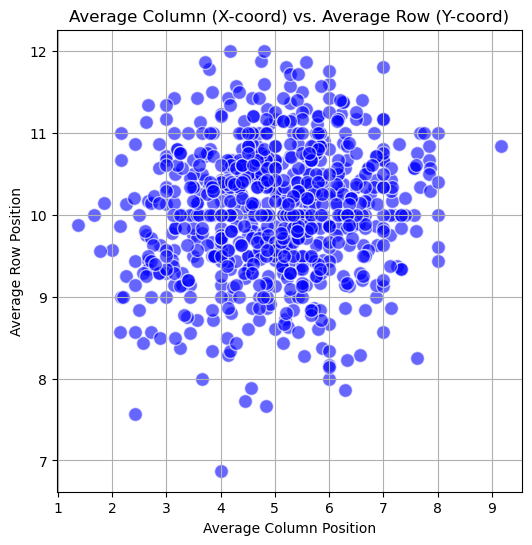

In [19]:
# Create a scatter plot for average column vs. average row positions of holds
plt.figure(figsize=(6, 6))
plt.scatter(avg_cols, avg_rows, alpha=0.6, c='blue', edgecolors='w', s=100)
plt.title('Average Column (X-coord) vs. Average Row (Y-coord)')
plt.xlabel('Average Column Position')
plt.ylabel('Average Row Position')
plt.grid(True)
plt.show()

Central Tendency: The points are concentrated around the center of the plot, suggesting that, on average, the problems use holds that are more centrally located on the climbing wall.

Spread and Variation: There's a wide spread of points in both the horizontal and vertical directions, indicating variability in the hold positions. However, there is less spread at the extremes (very top, bottom, or sides), suggesting fewer problems that are concentrated at the edges of the wall.

Prevalent Hold Positions: The density of points is greater in the middle rows (around rows 9 to 11) than in the upper or lower rows. This may indicate a preference or a natural tendency for problem setters to use holds in the middle part of the wall more often.

Column Position Variability: There appears to be a fairly even distribution of points across the average column positions, implying that problems are not biased toward the left or right side of the climbing wall.

Outliers: Some problems have average positions that are lower (around row 7) and some that are higher (above row 11). These could represent easier problems where climbers don't need to go very high or harder problems that utilize the full height of the wall.

Potential Setting Styles: The clustering in the center might suggest a setting style that clusters difficulties in the middle section of the wall, possibly to accommodate different heights of climbers and to focus on more technical moves rather than reachy ones.

### Visualization - Number of Holds vs. Average Row

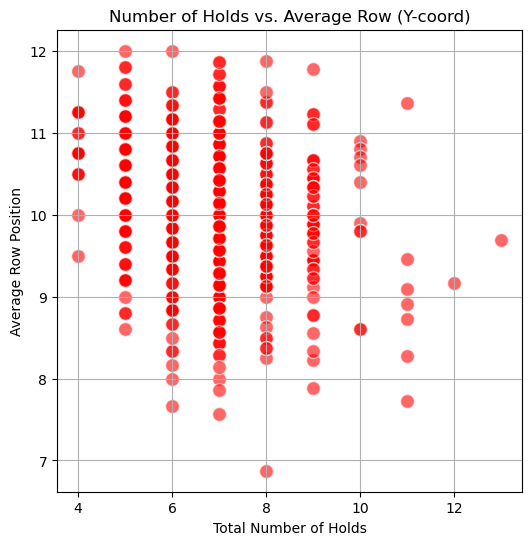

In [20]:
# Create a scatter plot for number of holds vs. average row positions of holds
plt.figure(figsize=(6, 6))
plt.scatter(num_holds, avg_rows, alpha=0.6, c='red', edgecolors='w', s=100)
plt.title('Number of Holds vs. Average Row (Y-coord)')
plt.xlabel('Total Number of Holds')
plt.ylabel('Average Row Position')
plt.grid(True)
plt.show()

Uniform Distribution Across Holds: There doesn't appear to be a strong trend or correlation between the number of holds and their average row position. This could suggest that problems with varying numbers of holds are spread fairly uniformly up and down the wall.

Concentration of Holds: There is a dense concentration of data points in the middle row positions across different numbers of holds. This indicates that most problems, regardless of the number of holds, tend to have a center of gravity in the middle of the wall vertically.

Vertical Spread: While there is a concentration around the middle, there is also a significant spread in the average row positions, especially for problems with 6 to 10 holds. This might reflect a variety in problem styles, with some problems set to be more top-heavy or bottom-heavy in their hold distribution.

Fewer Holds, Lower Variation: For problems with a smaller number of holds (4-5), there appears to be less variation in the average row position. This could be due to the limited number of holds restricting the variety of moves and therefore the vertical spread of the holds.

Outliers: Some problems with a larger number of holds show a lower average row position. These could be problems designed to be traverses or otherwise spread out horizontally rather than vertically.

Potential Clustering: Some vertical lines of data points, where the number of holds is the same but the average row position varies, suggest clustering. These could represent different sets or styles of problems that use a fixed number of holds.

Data Distribution: Most problems seem to have between 6 to 10 holds. Fewer problems have 4 or 5 holds, and even fewer have more than 10 holds.

### Number of Holds vs. Average Column

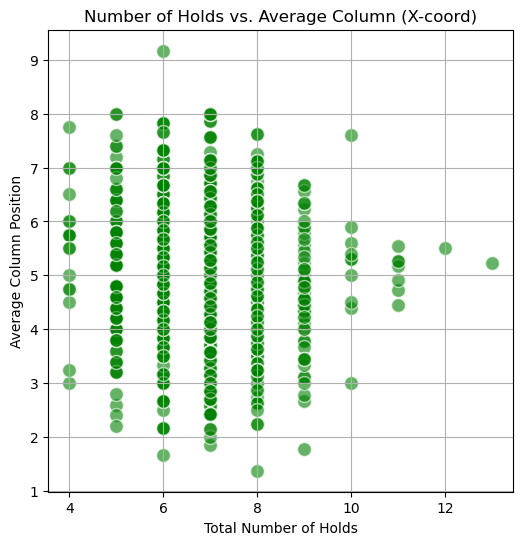

In [21]:
# Create a scatter plot for number of holds vs. average column positions of holds
plt.figure(figsize=(6, 6))
plt.scatter(num_holds, avg_cols, alpha=0.6, c='green', edgecolors='w', s=100)
plt.title('Number of Holds vs. Average Column (X-coord)')
plt.xlabel('Total Number of Holds')
plt.ylabel('Average Column Position')
plt.grid(True)
plt.show()

Horizontal Distribution: There is a wide distribution of the average column positions across different numbers of holds. This suggests a good horizontal spread of problems on the wall.

Central Concentration: Most of the average column positions, regardless of the number of holds, appear to be centered around the middle columns. This could indicate a preference for setting problems that are more balanced in their left-right placement on the wall, or it might be due to the structure of the climbing wall itself.

Column Variability: For problems with 6 to 10 holds, there's significant variability in the average column position. This variability decreases for problems with fewer than 6 holds and those with more than 10 holds. This could be due to a more uniform hold distribution for routes with fewer holds or a limitation in wall width for problems with more holds.

Uniform Hold Usage: The problems with 4 to 12 holds don't show a clear trend in the average column position changing with the number of holds. This could imply that routes are designed with an even distribution of holds from left to right, regardless of how many holds are used.

Potential Outliers: Some data points with a higher or lower average column position could indicate problems that are predominantly set to one side of the wall. These could be designed to provide a different climbing experience or to focus on specific types of movement (like lateral moves).

Route Design Implications: If the climbing wall has features such as overhangs or slabs, the distribution of column positions might be influenced by these features, with setters placing holds where they can create the most interesting or challenging problems.

Limited Edge Setting: There is a lack of problems set at the extreme edges (columns 1 and 9), which could indicate either a physical limitation of the wall or a setting preference to keep problems within a certain boundary for safety or practical reasons.

### Calculate aggregated difficulties and update DataFrame

In [22]:
# ensure they match
print("Length of avg_difficulties:", len(avg_difficulties))
print("Length of df:", len(df))

# Assuming the calculated difficulties pertain to df and its length matches
if len(avg_difficulties) == len(df):
    df['avg_difficulty'] = avg_difficulties
    df['max_difficulty'] = max_difficulties
    df['min_difficulty'] = min_difficulties
    df['avg_row'] = avg_rows
    df['avg_col'] = avg_cols
    df['num_holds'] = num_holds

    # Display the DataFrame with the new features added
    print(df.head())
else:
    print("Length mismatch. Ensure you are adding columns to the correct DataFrame.")

Length of avg_difficulties: 729
Length of df: 729
              start                                                mid  \
0  [[7, 4], [4, 5]]                 [[7, 7], [4, 9], [6, 12], [8, 15]]   
1         [[10, 4]]  [[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...   
2         [[10, 4]]  [[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...   
3  [[2, 4], [3, 2]]                [[5, 8], [2, 10], [3, 12], [1, 14]]   
4          [[7, 4]]                 [[7, 7], [5, 9], [6, 12], [4, 15]]   

         end grade                                    sorted_combined  \
0  [[6, 17]]    6B  [[7, 4], [4, 5], [7, 7], [4, 9], [6, 12], [8, ...   
1  [[4, 17]]    6B  [[10, 4], [9, 6], [6, 7], [7, 9], [5, 11], [6,...   
2  [[3, 17]]    6B  [[10, 4], [5, 6], [6, 8], [4, 9], [4, 11], [2,...   
3  [[6, 17]]    6B  [[3, 2], [2, 4], [5, 8], [2, 10], [3, 12], [1,...   
4  [[6, 17]]    6B  [[7, 4], [7, 7], [5, 9], [6, 12], [4, 15], [6,...   

   avg_difficulty  max_difficulty  min_difficulty    avg_row   avg

C:\Users\micha\AppData\Local\Temp\ipykernel_26356\639474838.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_difficulty'] = avg_difficulties
C:\Users\micha\AppData\Local\Temp\ipykernel_26356\639474838.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_difficulty'] = max_difficulties
C:\Users\micha\AppData\Local\Temp\ipykernel_26356\639474838.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

### Plot Grade Distribution

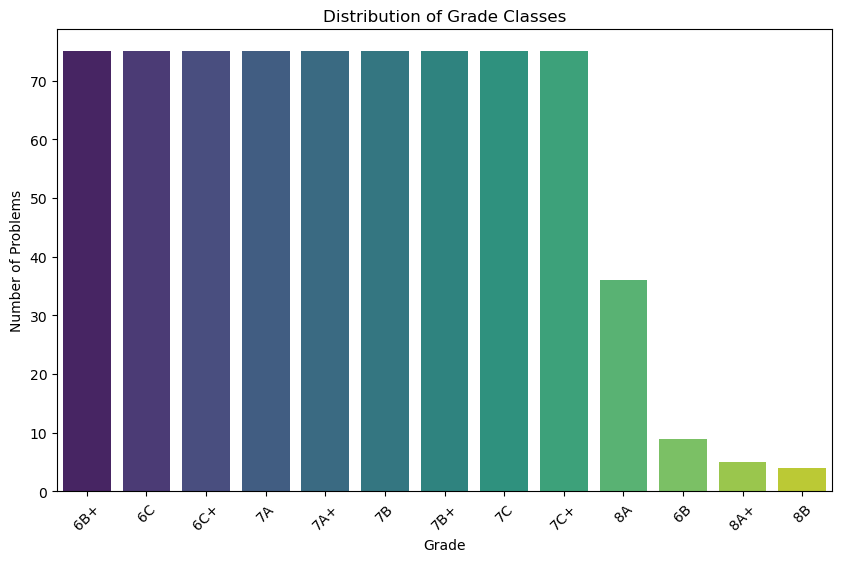

In [23]:
# Calculate the distribution of grade classes
grade_distribution = df['grade'].value_counts()

# Plot the distribution of grade classes
plt.figure(figsize=(10, 6))
sns.barplot(x=grade_distribution.index, y=grade_distribution.values, palette="viridis")
plt.title('Distribution of Grade Classes')
plt.xlabel('Grade')
plt.ylabel('Number of Problems')
plt.xticks(rotation=45)  # Rotate the grade labels for better readability
plt.show()

### Normalize Grade Distribution

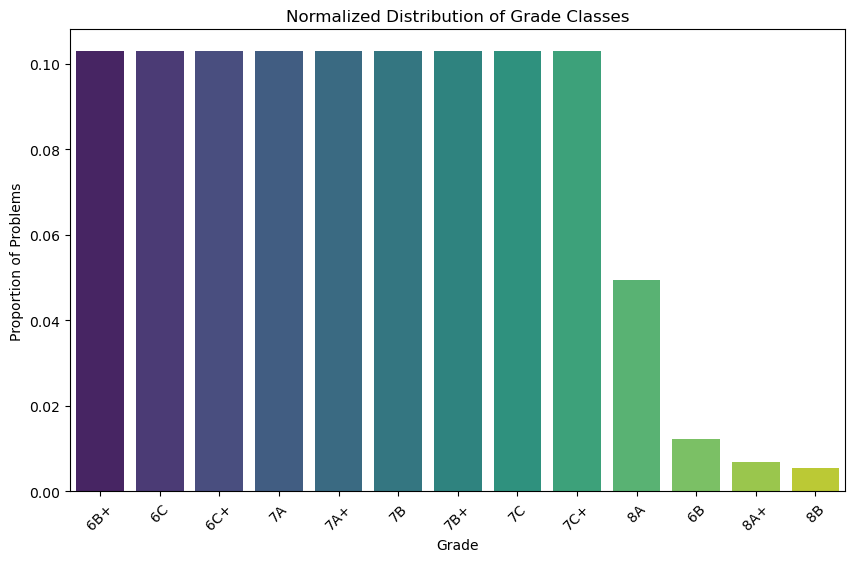

In [24]:
# Calculate the normalized distribution of grade classes
grade_distribution_normalized = df['grade'].value_counts(normalize=True)

# Plot the normalized distribution of grade classes
plt.figure(figsize=(10, 6))
sns.barplot(x=grade_distribution_normalized.index, y=grade_distribution_normalized.values, palette="viridis")
plt.title('Normalized Distribution of Grade Classes')
plt.xlabel('Grade')
plt.ylabel('Proportion of Problems')
plt.xticks(rotation=45)  # Rotate the grade labels for better readability
plt.show()

Grade Imbalance: The grade classes are obviously out of balance. There are a lot of difficulties in several grades, such as 6C+, 7A, 7A+, 7B, 7B+, and 7C, suggesting that these grades are well-represented in the dataset.

Underrepresented Grades: There are substantially fewer issues in other grades, particularly in those closer to the upper end of the difficulty range, such 8A+, 6B, 8A, and 8B. This may be due to the intrinsic difficulty of planning and carrying out climbs at these levels, or it may be a bias in the dataset favouring challenges with mid-level complexity.

Potential Data Collection Bias:A bias in the data gathering process could be the cause of the underrepresentation of the toughest grades and overrepresentation of mid-range grades. For instance, there might be fewer difficult problems because fewer climbers try them, or it's possible that not enough issues in these grades are included in the data source.

Impact on Machine Learning Models: the model might not work as well on the underrepresented grades and might be biassed towards correctly predicting the more common grades because there are more instances to work from.

Strategies for Addressing Imbalance: I will need to apply tactics to deal with the class imbalance, including resampling techniques or employing performance measurements that are insensitive to class imbalance.

Difficulty Progression: Given that most climbers would fall into the intermediate difficulty level, the chart may also represent the development of difficulty in climbing challenges.

### Normalized Grade Distribution Pie Chart:

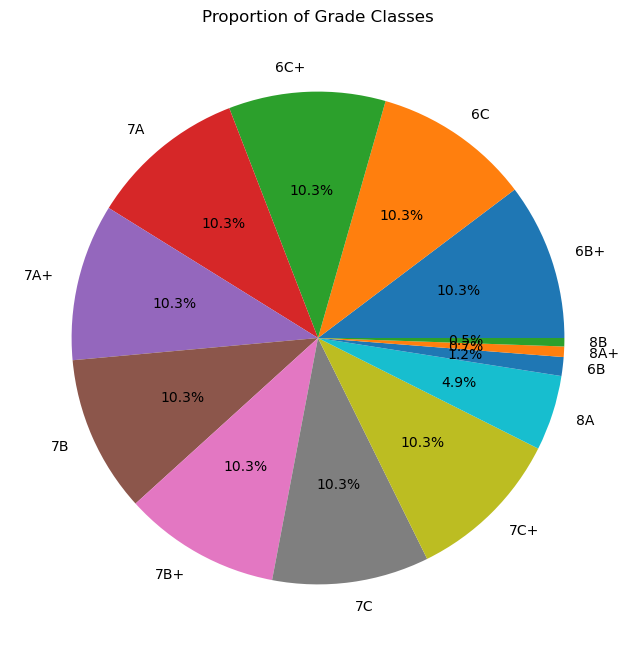

In [25]:
# Pie chart for normalized grade distribution
plt.figure(figsize=(8, 8))
df['grade'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Grade Classes')
plt.ylabel('')  # Hide the y-label as it's not relevant for pie charts
plt.show()

Equal Representation for Mid-Range Grades: Of the difficulties, roughly 10.3%, are accounted for by the grades 6C+, 7A, 7A+, 7B, and 7B+. This implies that these mid-range challenges are distributed fairly.

Lower Representation for Extreme Grades: Less representation exists for the easier grades, like 6B, and the toughest grades in the collection, like 8A, 8A+, and 8B. In particular, the combined percentage of 8A+ and 8B is only 1.2%, suggesting that these are relatively uncommon in the dataset.

Minority Classes: Only 0.5% of the problems are in Grade 6B, which is the least represented. This may indicate a possible difficulty with data collecting or a real-world trend of fewer issues being assigned or recorded at this grade level.

Sufficient Data for Common Grades: The usual climbing grades, which are probably within the ability range of many climbers, contain the majority of the dataset.

Impact on Analysis: The unbalanced grade distribution may affect analyses (like some statistical models) that rely on a uniform distribution of grades. This could result in a less accurate prediction model for underrepresented grades in predictive modelling.

Considerations for Route Setting: This dataset may indicate that route setters concentrate more often on producing difficulties in the 6C+ to 7C range, maybe to accommodate the skill level of the bulk of their climbers, if it accurately represents actual climbing gym route setting.

Strategies for Training ML Models: In order to increase model performance across all grades, it may be required to take into account techniques like stratified sampling, class weights, or data augmentation for underrepresented classes when utilising this data to train machine learning models.

### Cumulative Distribution Function

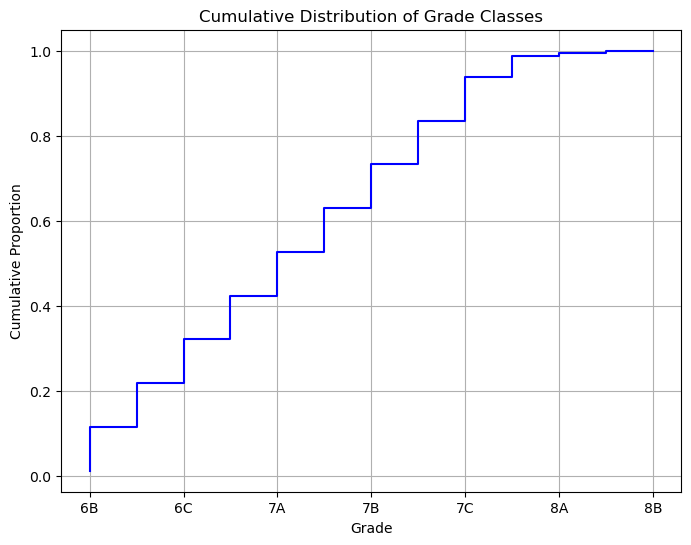

In [26]:
# CDF of the grade distribution
plt.figure(figsize=(8, 6))
grade_distribution = df['grade'].value_counts(normalize=True).sort_index().cumsum()
grade_distribution.plot(drawstyle='steps-pre', color='blue')
plt.title('Cumulative Distribution of Grade Classes')
plt.xlabel('Grade')
plt.ylabel('Cumulative Proportion')
plt.grid(True)
plt.show()

Gradual Progression: The CDF increases in a stepwise fashion, which is typical for discrete categories like climbing grades. Each step represents an increase in the cumulative proportion of problems as you move to higher grades.

Low-Grade Availability: The CDF starts at grade 6B and rises quickly, indicating a significant number of problems at the lower end of the grade spectrum.

Mid-Grade Dominance: There is a substantial jump in the CDF around the mid-grades (6C to 7C). This suggests a large concentration of problems within these grades, indicating that these are the most common difficulty levels.

Upper-Grade Rarity: As grades progress into the 8A and above range, the CDF flattens out, indicating fewer problems at these higher difficulty levels.

Representation of All Grades: The CDF reaches close to 1 by the highest grade, 8B, which means almost all grade classes are represented in the dataset.

General Implications for Climbers: Most climbers, especially those working in the intermediate grades, have a wide selection of problems available. However, advanced climbers looking for grades above 8A have fewer options.

Potential Use Case for Gym Owners/Route Setters: If this distribution is reflective of a climbing gym's route setting, it suggests a good variety of problems up to 7C, but it may need to increase the number of problems at both the lower end (6B) and the upper end (8A and 8B) to cater to a broader range of climbers' abilities.

Data Consideration for Analysis: For any kind of analytical modeling or machine learning, the imbalance in the distribution could be a factor to consider, as models might become biased towards predicting mid-grade problems more accurately than the rarer high-grade problems. Techniques like weighted training or synthetic data generation might be necessary to balance the training process.

### Box Plots for Positional Features by Grade:

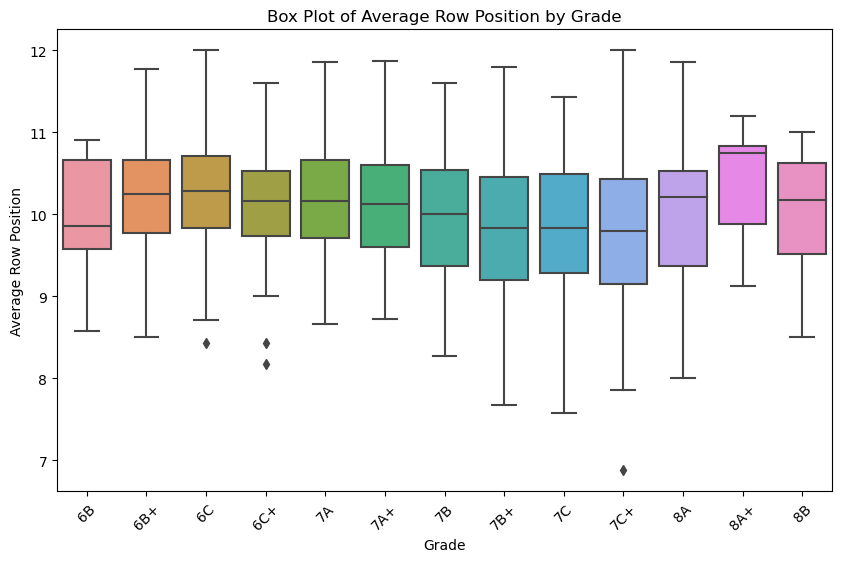

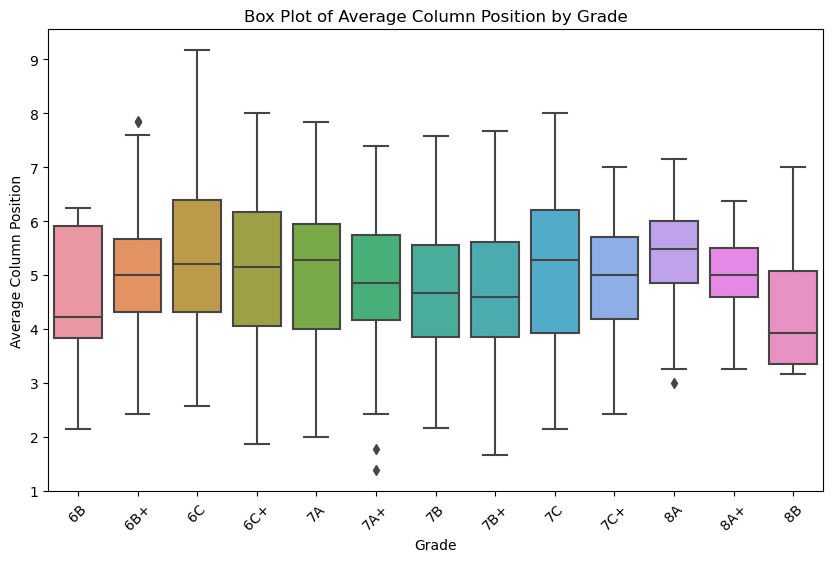

In [27]:
# Box plot for average row position by grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='avg_row', data=df)
plt.title('Box Plot of Average Row Position by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Row Position')
plt.xticks(rotation=45)
plt.show()

# Box plot for average column position by grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='avg_col', data=df)
plt.title('Box Plot of Average Column Position by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Column Position')
plt.xticks(rotation=45)
plt.show()

Average Row Position by Grade:
Central Tendency: Most grades have their median average row positions around the center of the vertical axis of the wall (between rows 9 and 11). This suggests that, on average, problems are set with holds centered around the mid-height of the wall, which is typical for balanced route setting.
Consistency Across Grades: The similarity in median values across grades implies that there is no strong preference for setting problems of any specific grade at a particular height on the wall.
Outliers: There are a few outliers for lower grades (6B), indicating that there are some problems at this level which have holds significantly lower or higher than the typical range.
Spread and Variation: The interquartile range (IQR), representing the middle 50% of data, is fairly consistent across grades, suggesting a similar vertical spread in the placement of holds regardless of difficulty.
Average Column Position by Grade:
Horizontal Spread: The median average column positions for most grades hover around the midpoint of the horizontal axis of the wall, suggesting a central tendency in hold placement from left to right as well.
Variability: Some grades, such as 6C+ and 7C, show more variability in hold placement across the wall width, as indicated by the longer IQR.
Symmetry: The symmetry in the distribution for most grades indicates that problems are typically set without a bias toward the left or right side of the wall.
Extreme Grades: The box plots for grades 8A+ and 8B are narrower and shifted towards the lower end, which could suggest a tendency to set holds for more difficult problems towards one side of the wall. This might reflect a specific setting style for harder problems, or it could be due to fewer problems at these grades providing a smaller sample size.

### Heatmap of Hold Positions:

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def create_heatmap_for_grade(df, grade, wall_width, wall_height):
    # Filter for the specific grade
    grade_df = df[df['grade'] == grade]

    # Extract all positions from the 'sorted_combined' column
    all_positions = [pos for hold_list in grade_df['sorted_combined'] for pos in hold_list]

    # Create a 2D histogram (or heatmap data) of the hold positions
    heatmap_data, xedges, yedges = np.histogram2d(
        [pos[0] for pos in all_positions],  # Column positions
        [pos[1] for pos in all_positions],  # Row positions
        bins=[np.arange(0, wall_width+1), np.arange(0, wall_height+1)]
    )
    
    # Plot the heatmap
    plt.imshow(heatmap_data.T, cmap='hot', interpolation='nearest', origin='lower')
    plt.colorbar(label='Number of Holds')
    plt.title(f'Heatmap of Hold Positions for Grade {grade}')
    plt.xlabel('Column Position')
    plt.ylabel('Row Position')
    plt.xticks(ticks=np.arange(wall_width), labels=np.arange(1, wall_width+1))
    plt.yticks(ticks=np.arange(wall_height), labels=np.arange(1, wall_height+1))
    plt.show()

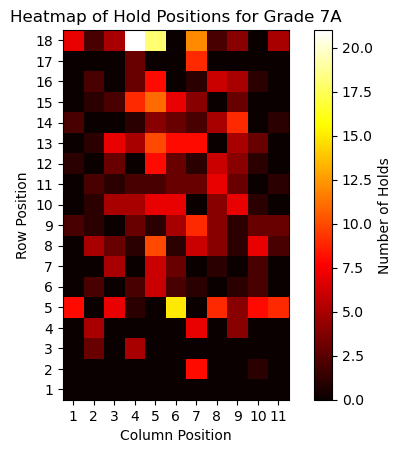

In [29]:
# Set the wall dimensions (width and height)
wall_width = 11  
wall_height = 18  

# Call the function to create a heatmap for grade '7A'
create_heatmap_for_grade(df, '7A', wall_width, wall_height)

Hold Concentration: The brighter spots on the heatmap suggest areas where holds are most frequently placed, indicating popular locations for route setters when designing 7A problems.

Wall Utilization: Areas with uniformly dark or light colors would indicate either under-utilized or preferred zones of the wall for this grade. If a certain row or column consistently shows up as brighter, it's an area of high hold concentration.

Difficulty Focus: The distribution of bright spots might correlate with the typical movements or techniques required for 7A climbs. For example, if brighter spots are clustered in the middle columns and higher rows, this might indicate a preference for problems that require reaching or technical movements associated with the central and upper parts of the wall.

Route Setting Patterns: Patterns in the heatmap could reveal the setters' tendencies, such as favoring certain types of holds or movements in specific areas of the wall.

Training Insights: Climbers training for 7A grade problems might focus on the areas of the wall that are most commonly used for setting this grade, as indicated by the heatmap.

Safety and Accessibility: The distribution may also reflect safety considerations (e.g., avoiding the very top and bottom of the wall) or accessibility (e.g., setting more holds in reach of an average climber's height).

### Ordinal Encoding for 'grade' and Compute Correlation

### Copy the DataFrame

In [30]:
# Copy the DataFrame to avoid changing the original data
df_encoded = df.copy()

### Ordinal Encoding of the 'grade' Column

In [31]:
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'grade' column and replace it with its encoded version
df_encoded['grade_encoded'] = encoder.fit_transform(df_encoded[['grade']])

### Compute the Correlation Matrix

In [32]:
# Compute the correlation matrix including the encoded grade
correlation_matrix = df_encoded[['num_holds', 'avg_row', 'avg_col', 'grade_encoded']].corr()

### Plot the Correlation Heatmap

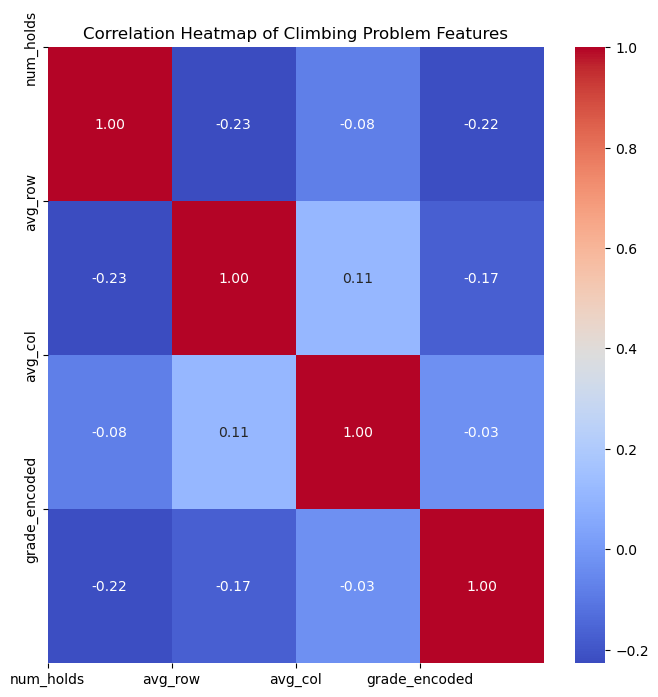

In [33]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Climbing Problem Features')
# Adjust the labels if necessary to match the column names in your df_encoded DataFrame
plt.xticks(ticks=np.arange(correlation_matrix.shape[1]), labels=['num_holds', 'avg_row', 'avg_col', 'grade_encoded'])
plt.yticks(ticks=np.arange(correlation_matrix.shape[1]), labels=['num_holds', 'avg_row', 'avg_col', 'grade_encoded'])
plt.show()

Number of Holds (num_holds): The values near 0 suggest that there is not a strong link between this feature and the average row (avg_row) or average column (avg_col) positions. There is a small negative link between the number of holds and the grade, indicating that a higher number of holds may generally result in a poorer grade.

Average Row Position (avg_row): The amount of holds has a negative connection, which may suggest that problems with more holds are typically not as high up the wall. Neither the encoded grade nor the average column position show any discernible association.

Average Column Position (avg_col): Like avg_row, there isn't much of a correlation with other characteristics. This implies that there may not be a direct correlation between the quantity of holds or the degree of difficulty and the left-to-right position of the holds on the wall.

Grade Encoded (grade_encoded): There is a little negative association between the encoded grade and avg_row and the number of holdings. This could indicate that routes that are positioned lower on the wall or have fewer holds are judged harder, but the correlation is not great enough to draw firm conclusions.

In the context of climbing, The kind of grips, the spacing between holds, the angle of the wall, and other variables that are not fully captured by positional measurements alone all contribute to the complexity of a challenge. Therefore, further research would be required to completely understand what determines climbing problem grades, even if this heatmap offers a high-level picture of linear interactions between some factors. Perhaps this research might be done using machine learning models that can capture non-linear relationships.

### Define Mapping Function

In [34]:
# Define the function to map original grades to group numbers
def map_grade_to_group(grade):
    if grade in ['6B', '6B+', '6C', '6C+']:
        return 'Beginner'
    elif grade in ['7A', '7A+', '7B', '7B+']:
        return 'Intermediate'
    elif grade in ['7C', '7C+', '8A', '8A+']:
        return 'Advanced'
    elif grade in ['8B', '8B+']:
        return 'Expert'
    else:
        return 'Unspecified'

### Reverse Mapping Encoded Grades

In [35]:
# Reverse mapping from encoded grades back to the original grade strings
inverse_grade_mapping = {index: grade for index, grade in enumerate(encoder.categories_[0])}
df_encoded['grade_original'] = df_encoded['grade_encoded'].map(inverse_grade_mapping)

### Mapping Encoded Grades to Groups

In [36]:
# Apply the mapping function to the original grade strings to create a 'grade_group' column
df_encoded['grade_group'] = df_encoded['grade_original'].apply(map_grade_to_group)

### Display the DataFrame

In [37]:
# Display the first few rows of the DataFram to verify the results
display_columns = ['grade', 'grade_encoded', 'grade_original', 'grade_group']
print(df_encoded[display_columns].head())

  grade  grade_encoded grade_original grade_group
0    6B            0.0             6B    Beginner
1    6B            0.0             6B    Beginner
2    6B            0.0             6B    Beginner
3    6B            0.0             6B    Beginner
4    6B            0.0             6B    Beginner


### Display Entries of Each Unique Grade

In [38]:
# Display a few entries from each unique grade
df_sampled_by_grade = df_encoded.groupby('grade').apply(lambda x: x.head(2)).reset_index(drop=True)
print(df_sampled_by_grade)

                start                                                mid  \
0    [[7, 4], [4, 5]]                 [[7, 7], [4, 9], [6, 12], [8, 15]]   
1           [[10, 4]]  [[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...   
2            [[5, 4]]                 [[4, 7], [7, 9], [6, 12], [4, 14]]   
3    [[6, 3], [4, 5]]                 [[7, 9], [4, 9], [5, 13], [8, 13]]   
4    [[5, 4], [9, 4]]      [[9, 7], [10, 10], [8, 11], [8, 13], [4, 14]]   
5            [[5, 4]]                 [[6, 7], [2, 9], [6, 12], [6, 16]]   
6            [[5, 4]]                [[1, 15], [3, 14], [3, 10], [7, 9]]   
7    [[4, 5], [6, 1]]  [[0, 13], [3, 16], [4, 10], [4, 11], [4, 15], ...   
8            [[5, 4]]  [[1, 7], [4, 12], [6, 12], [6, 16], [1, 10], [...   
9            [[5, 4]]       [[2, 12], [3, 14], [7, 10], [8, 12], [9, 7]]   
10           [[5, 4]]        [[0, 8], [4, 8], [4, 11], [5, 13], [8, 14]]   
11   [[4, 5], [6, 1]]        [[6, 14], [7, 15], [7, 9], [8, 9], [9, 12]]   
12          

### Inspecting thr different dataframes ive created to understand how they differ

### Inspect Original DataFrame

In [39]:
# Display the first few rows of the original DataFrame
print("Original DataFrame:")
print(df.head())

Original DataFrame:
              start                                                mid  \
0  [[7, 4], [4, 5]]                 [[7, 7], [4, 9], [6, 12], [8, 15]]   
1         [[10, 4]]  [[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...   
2         [[10, 4]]  [[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...   
3  [[2, 4], [3, 2]]                [[5, 8], [2, 10], [3, 12], [1, 14]]   
4          [[7, 4]]                 [[7, 7], [5, 9], [6, 12], [4, 15]]   

         end grade                                    sorted_combined  \
0  [[6, 17]]    6B  [[7, 4], [4, 5], [7, 7], [4, 9], [6, 12], [8, ...   
1  [[4, 17]]    6B  [[10, 4], [9, 6], [6, 7], [7, 9], [5, 11], [6,...   
2  [[3, 17]]    6B  [[10, 4], [5, 6], [6, 8], [4, 9], [4, 11], [2,...   
3  [[6, 17]]    6B  [[3, 2], [2, 4], [5, 8], [2, 10], [3, 12], [1,...   
4  [[6, 17]]    6B  [[7, 4], [7, 7], [5, 9], [6, 12], [4, 15], [6,...   

   avg_difficulty  max_difficulty  min_difficulty    avg_row   avg_col  \
0        5.142857     

###  Inspect Encoded DataFrame

In [40]:
# Display the first few rows of the DataFrame with encoded grades
print("\nDataFrame with Encoded Grades:")
print(df_encoded.head())


DataFrame with Encoded Grades:
              start                                                mid  \
0  [[7, 4], [4, 5]]                 [[7, 7], [4, 9], [6, 12], [8, 15]]   
1         [[10, 4]]  [[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...   
2         [[10, 4]]  [[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...   
3  [[2, 4], [3, 2]]                [[5, 8], [2, 10], [3, 12], [1, 14]]   
4          [[7, 4]]                 [[7, 7], [5, 9], [6, 12], [4, 15]]   

         end grade                                    sorted_combined  \
0  [[6, 17]]    6B  [[7, 4], [4, 5], [7, 7], [4, 9], [6, 12], [8, ...   
1  [[4, 17]]    6B  [[10, 4], [9, 6], [6, 7], [7, 9], [5, 11], [6,...   
2  [[3, 17]]    6B  [[10, 4], [5, 6], [6, 8], [4, 9], [4, 11], [2,...   
3  [[6, 17]]    6B  [[3, 2], [2, 4], [5, 8], [2, 10], [3, 12], [1,...   
4  [[6, 17]]    6B  [[7, 4], [7, 7], [5, 9], [6, 12], [4, 15], [6,...   

   avg_difficulty  max_difficulty  min_difficulty    avg_row   avg_col  \
0        5

### Inspect DataFrame with Grade Groups

In [41]:
# If you have a DataFrame with grade groups, display the first few rows
print("\nDataFrame with Grade Groups:")
print(df_encoded[['grade', 'grade_encoded', 'grade_group']].head())


DataFrame with Grade Groups:
  grade  grade_encoded grade_group
0    6B            0.0    Beginner
1    6B            0.0    Beginner
2    6B            0.0    Beginner
3    6B            0.0    Beginner
4    6B            0.0    Beginner


### Check DataFrame Shapes

In [42]:
# Print out the shapes of the DataFrames for comparison
print("\nShapes of the DataFrames:")
print(f"Original df shape: {df.shape}")
print(f"Encoded df shape: {df_encoded.shape}")
# If df_grade_groups exists or if 'grade_group' is in df_encoded
print(f"DataFrame with grade groups shape: {df_encoded.shape}")


Shapes of the DataFrames:
Original df shape: (729, 11)
Encoded df shape: (729, 14)
DataFrame with grade groups shape: (729, 14)


### Prepare Data for Modeling

### Define Features and Target Variable

### Convert the difficulty matrix to a DataFrame

In [43]:
difficulty_df = pd.DataFrame(difficulty_matrix)

### Generate new feature names for the difficulty matrix to avoid conflicts

In [44]:
# Create feature names using the sorted coordinates from coord_to_index
difficulty_features = [f"difficulty_{coord[0]}_{coord[1]}" for coord in sorted(coord_to_index)]

# Create the difficulty DataFrame with correct column names
difficulty_df = pd.DataFrame(difficulty_matrix, columns=difficulty_features)


In [45]:
# coord_to_index = {(x, y): i for i, (x, y) in enumerate(sorted(hold_difficulties))}
# feature names using the coordinate mappings
# difficulty_features = [f"difficulty_{coord[0]}_{coord[1]}" for coord in sorted(coord_to_index)]

# difficulty_df.columns = difficulty_features

### Prepare DataFrame features from df_encoded, excluding object, target columns, and non-feature columns

In [46]:
feature_columns = [col for col in df_encoded.columns if col not in ('grade', 'start', 'mid', 'end', 'sorted_combined', 'grade_group', 'grade_original', 'grade_encoded')]
df_features = df_encoded[feature_columns]


### Concatenate the features from df_encoded and the difficulty matrix features

In [47]:
combined_features = pd.concat([df_features.reset_index(drop=True), difficulty_df.reset_index(drop=True)], axis=1)

### Encode the 'grade_group' column

In [48]:
encoder = OrdinalEncoder(categories=[['Beginner', 'Intermediate', 'Advanced', 'Expert']])
df_encoded['grade_group_encoded'] = encoder.fit_transform(df_encoded[['grade_group']])

### split the data into training and testing sets and fit your model

In [49]:
X = combined_features
y = df_encoded['grade_group_encoded'].values.ravel()

### Stratified Train-Test Split

In [50]:
# Perform a stratified split to maintain the proportion of each grade
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### SMOTE Resampling

In [51]:
# # Apply SMOTE to oversample the minority classes in the training set
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

reduce the number of neighbors that SMOTE uses, ensuring it's less than or equal to the smallest class count. First, let's check the smallest class count in the training data, and then adjust the n_neighbors parameter accordingly.

### Check Minimum Class Count

In [52]:
(unique, counts) = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
min_class_count = counts.min()
print("Minimum class count:", min_class_count)
print("Class counts:", class_counts)

Minimum class count: 3
Class counts: {0.0: 187, 1.0: 240, 2.0: 153, 3.0: 3}


### Apply SMOTE with Adjusted Neighbors

In [53]:
# Apply SMOTE to oversample the minority classes in the training set
# Since the minimum class count is 3, set k_neighbors to 2
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Undersample the Training Set

In [54]:
# Apply Random Under Sampling to balance the training set
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

### Feature Scaling

In [55]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# If needed, scale the SMOTE and undersampled sets too
X_train_smote_scaled = scaler.transform(X_train_smote)
X_train_under_scaled = scaler.transform(X_train_under)

### Summary of Dataset Shapes

In [56]:
# Print the shapes of the various datasets
print("Original shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

print("\nAfter SMOTE resampling:")
print("X_train_smote:", X_train_smote.shape)

print("\nAfter Undersampling:")
print("X_train_under:", X_train_under.shape)

print("\nAfter Feature Scaling:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("X_train_smote_scaled:", X_train_smote_scaled.shape)
print("X_train_under_scaled:", X_train_under_scaled.shape)

Original shapes:
X_train: (583, 146)
X_test: (146, 146)

After SMOTE resampling:
X_train_smote: (960, 146)

After Undersampling:
X_train_under: (12, 146)

After Feature Scaling:
X_train_scaled: (583, 146)
X_test_scaled: (146, 146)
X_train_smote_scaled: (960, 146)
X_train_under_scaled: (12, 146)


### Initialize and Train Logistic Regression Model with Cross-Validation

In [57]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')

# Perform cross-validation on the training set and print the results
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores (5 folds):", cv_scores)
print("Average CV Score:", cv_scores.mean())

C:\Users\micha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores (5 folds): [0.61538462 0.58119658 0.58119658 0.51724138 0.64655172]
Average CV Score: 0.5883141762452108


### Evaluating performance using cross validation

Scores: The cross-validation scores across 5 folds vary from about 51.72% to 64.66%, with an average score of approximately 58.83%.
Interpretation: The variability and relatively low average score in the cross-validation suggest that the model might not be robust across different subsets of the data. This is a sign of overfitting where the model is tuned too closely to the training set but fails to perform consistently across varied data samples.

### Fit Model on Entire Training Set

In [58]:
# Fit the model to the entire training data for final evaluation
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

### Evaluate Model on the Training Set

In [59]:
# Predict and evaluate on the training set
y_train_pred = log_reg.predict(X_train_scaled)
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       187
         1.0       0.87      0.88      0.87       240
         2.0       0.99      0.98      0.98       153
         3.0       1.00      1.00      1.00         3

    accuracy                           0.90       583
   macro avg       0.93      0.93      0.93       583
weighted avg       0.90      0.90      0.90       583

Training Set Accuracy: 0.8953687821612349


### Evaluating performance on training set

Accuracy: The model achieves an accuracy of approximately 89.54% on the training set. This suggests that the model fits the training data well.
Precision, Recall, and F1-Score:
Classes 0, 1, and 2 have high precision and recall scores, indicating good performance in identifying these categories.
The model perfectly identifies class 3, although with only 3 instances, this might not be indicative of general performance but more a result of limited data.
Summary: The training set results suggest that the model is very effective in classifying the training data, with especially strong performance for the higher classes (2 and 3).

### Evaluate Model on the Test Set

In [60]:
# Predict and evaluate on the test set
y_test_pred = log_reg.predict(X_test_scaled)
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))

Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74        47
         1.0       0.59      0.57      0.58        60
         2.0       0.62      0.66      0.64        38
         3.0       0.00      0.00      0.00         1

    accuracy                           0.64       146
   macro avg       0.49      0.49      0.49       146
weighted avg       0.64      0.64      0.64       146

Test Set Accuracy: 0.6438356164383562


### Evaluating performance on test set

Accuracy: The accuracy drops significantly to about 64.38% on the test set, indicating potential overfitting as the model performs worse on unseen data.
Precision, Recall, and F1-Score:
Precision and recall for classes 0 and 2 are reasonable, but the scores for class 1 are moderately lower, suggesting some difficulties in distinguishing this class.
Class 3 shows a complete inability to classify correctly (both precision and recall are 0). Given there is only one sample of class 3 in the test set, the model’s performance here is not reliable but still a point of concern.
Summary: The test results reveal a marked decrease in performance across most metrics compared to the training data. This suggests that the model may not generalize well to new, unseen data.

### Evaluating logistic regression on base training data

The model appears to be overfitting the training data, as indicated by the high performance on the training set but much lower and inconsistent results on the test set and during cross-validation.
The performance on class 3 is particularly concerning due to the lack of data, which does not allow the model to learn effectively how to classify this class.
To improve the model, consider gathering more data, especially for underrepresented classes like class 3, and explore model regularization techniques or parameter tuning to enhance generalization.

### Logistic Regression on SMOTE-Resampled Data

### Initialize the Logistic Regression model for the SMOTE dataset

In [61]:
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')

### Perform cross-validation on the SMOTE-resampled training set

In [62]:
cv_scores_smote = cross_val_score(log_reg_smote, X_train_smote_scaled, y_train_smote, cv=5)

### Print the cross-validation scores for the SMOTE-resampled training set

In [63]:
print("Cross-Validation Scores (5 folds) on SMOTE Data:", cv_scores_smote)
print("Average CV Score on SMOTE Data:", cv_scores_smote.mean())

Cross-Validation Scores (5 folds) on SMOTE Data: [0.765625   0.72916667 0.734375   0.72395833 0.84895833]
Average CV Score on SMOTE Data: 0.7604166666666667


### Evaluating SMOTE Logistic regression using Cross validation

Scores: The cross-validation scores are significantly improved, ranging from about 72.40% to 84.90% with an average score of 76.04%.
Interpretation: These improved scores suggest that the model, when trained with balanced data, is indeed more robust and generalizes better across different subsets of data compared to the original dataset.

### Fit the model on the SMOTE-resampled training data

In [64]:
log_reg_smote.fit(X_train_smote_scaled, y_train_smote)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

### Evaluate the model on the training set

In [65]:
y_train_smote_pred = log_reg_smote.predict(X_train_smote_scaled)
print("\nTraining Set (SMOTE) Classification Report:")
print(classification_report(y_train_smote, y_train_smote_pred))
print("Training Set (SMOTE) Accuracy:", accuracy_score(y_train_smote, y_train_smote_pred))


Training Set (SMOTE) Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       240
         1.0       0.88      0.85      0.86       240
         2.0       0.98      1.00      0.99       240
         3.0       1.00      1.00      1.00       240

    accuracy                           0.93       960
   macro avg       0.93      0.93      0.93       960
weighted avg       0.93      0.93      0.93       960

Training Set (SMOTE) Accuracy: 0.9322916666666666


### Evaluating SMOTE Logistic regression on training set

Accuracy: The model achieves an accuracy of about 93.23% on the SMOTE-augmented training set. This is an improvement compared to the original training set accuracy, indicating a more balanced and potentially more generalized model.
Precision, Recall, and F1-Score:
All classes show high precision and recall, suggesting that the model effectively classifies all difficulty levels after data augmentation with SMOTE.
Class 2 and class 3 exhibit nearly perfect scores, which are notably reliable due to the equalized number of instances across all classes.
Summary: These metrics indicate excellent model performance on the SMOTE-augmented data, suggesting that balancing the class distribution helps the model learn better and more uniformly across different classes.

### Evaluate the model on the test set

In [66]:
y_test_pred_smote = log_reg_smote.predict(X_test_scaled)
print("\nTest Set Classification Report (SMOTE Model):")
print(classification_report(y_test, y_test_pred_smote))
print("Test Set Accuracy (SMOTE Model):", accuracy_score(y_test, y_test_pred_smote))


Test Set Classification Report (SMOTE Model):
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.73        47
         1.0       0.59      0.55      0.57        60
         2.0       0.62      0.66      0.64        38
         3.0       0.00      0.00      0.00         1

    accuracy                           0.64       146
   macro avg       0.48      0.49      0.48       146
weighted avg       0.63      0.64      0.64       146

Test Set Accuracy (SMOTE Model): 0.636986301369863


### Evaluating SMOTE Logistic regression on test set

Accuracy: The test set accuracy remains roughly the same at about 63.70%, which does not show improvement despite better training metrics.
Precision, Recall, and F1-Score:
There's a small improvement in the precision for class 0, but overall, scores for precision, recall, and f1-score are quite similar to the non-SMOTE model results.
Class 3 still shows no capability in the model to predict correctly, which is consistent with the first model and indicative of either an intrinsic difficulty in identifying this class or insufficient examples even after SMOTE augmentation.
Summary: The lack of improvement in test set performance suggests that while SMOTE helps in balancing the training data and improving training performance, it does not necessarily translate into better generalization to new data.

### Logistic Regression on Undersampled Data

### Initialize the Logistic Regression model for the undersampled dataset

In [67]:
log_reg_under = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')

### Perform cross-validation on the undersampled training set

In [68]:
unique, counts = np.unique(y_train_under, return_counts=True)
min_class_count = counts.min()

# Ensure the number of folds does not exceed the smallest class count
cv_folds = min(5, min_class_count)  # or simply use min_class_count if it's always going to be limiting

# Apply cross-validation using the appropriate number of folds
from sklearn.model_selection import cross_val_score
cv_scores_under = cross_val_score(log_reg_under, X_train_under_scaled, y_train_under, cv=cv_folds)

### cross-validation scores for the undersampled training set

In [69]:
print("Cross-Validation Scores (5 folds) on Undersampled Data:", cv_scores_under)
print("Average CV Score on Undersampled Data:", cv_scores_under.mean())

Cross-Validation Scores (5 folds) on Undersampled Data: [0.25 0.25 0.25]
Average CV Score on Undersampled Data: 0.25


### Evaluating the cross-validation on the undersampled df

Scores: The cross-validation scores are extremely low, each consistently at 25%.
Interpretation: These uniformly low scores across different subsets of data underscore the model's lack of robustness and poor generalization capability when trained on undersampled data.

### Fit the model on the entire undersampled training data for final evaluation

In [70]:
log_reg_under.fit(X_train_under_scaled, y_train_under)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

### Evaluate the model on the training set

In [71]:
y_train_under_pred = log_reg_under.predict(X_train_under_scaled)
print("\nTraining Set (Undersampled) Classification Report:")
print(classification_report(y_train_under, y_train_under_pred))
print("Training Set (Undersampled) Accuracy:", accuracy_score(y_train_under, y_train_under_pred))


Training Set (Undersampled) Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         3
         3.0       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Training Set (Undersampled) Accuracy: 1.0


### Evaluating the undersampled df logistic regression on training set

The training set results, while technically flawless, are likely not very informative or indicative of real-world performance. This is because the training dataset is extremely small (only 12 instances in total), which typically does not provide enough variability or complexity to challenge and properly train the model.

### Evaluate the model on the test set

In [72]:
y_test_pred_under = log_reg_under.predict(X_test_scaled)
print("\nTest Set Classification Report (Undersampled Model):")
print(classification_report(y_test, y_test_pred_under))
print("Test Set Accuracy (Undersampled Model):", accuracy_score(y_test, y_test_pred_under))


Test Set Classification Report (Undersampled Model):
              precision    recall  f1-score   support

         0.0       0.52      0.64      0.57        47
         1.0       0.43      0.15      0.22        60
         2.0       0.37      0.26      0.31        38
         3.0       0.00      0.00      0.00         1

    accuracy                           0.34       146
   macro avg       0.33      0.26      0.28       146
weighted avg       0.44      0.34      0.36       146

Test Set Accuracy (Undersampled Model): 0.3356164383561644


### Evaluating undersampled logistic regression on the test set

Accuracy: The test set accuracy is significantly reduced to about 33.56%, which is a substantial drop compared to the original and SMOTE models.
Precision, Recall, and F1-Score:
The scores are low across all classes, particularly for classes 1 and 2, and there is a failure to identify class 3 at all.
The lower scores suggest that the model struggles significantly to generalize to new data when trained on such a small and not representative sample.
Summary: The test results reveal a severe decline in the model's ability to generalize, demonstrating the typical downside of undersampling—loss of valuable information and reduced model robustness.

### Calculate Accuracies for Each Model

In [73]:
base_model_accuracy = accuracy_score(y_test, y_test_pred)  # from the base model
smote_model_accuracy = accuracy_score(y_test, y_test_pred_smote)  # from the SMOTE model
undersampled_model_accuracy = accuracy_score(y_test, y_test_pred_under)  # from the undersampled model

### Visualize Model Accuracies

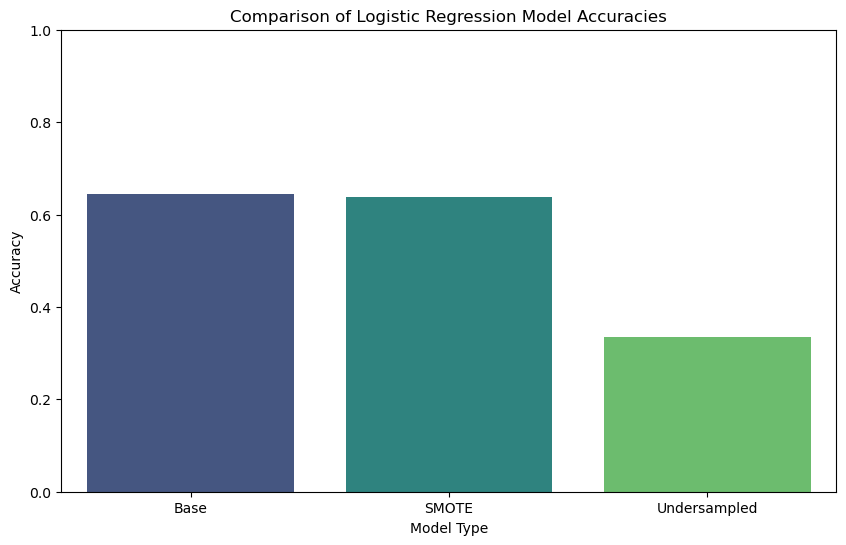

In [74]:
# Data preparation for visualization
model_names = ['Base', 'SMOTE', 'Undersampled']
accuracies = [base_model_accuracy, smote_model_accuracy, undersampled_model_accuracy]

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Comparison of Logistic Regression Model Accuracies')
plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()

Base Model: The bar representing the base model is the highest, which suggests that the base model has the best accuracy among the three models. This implies that for the given dataset, the base model without any resampling methods may be performing well enough.

SMOTE Model: The accuracy of the model trained on SMOTE resampled data is lower than the base model but still holds a moderate level of accuracy. This could indicate that while SMOTE helps to balance the dataset, it might introduce some noise or overfitting due to synthetic sample generation.

Undersampled Model: The undersampled model shows the lowest accuracy among the three. This could be a result of loss of information due to the reduction of the majority class, leading to poorer performance on the test set.

### Evaluating the results of the base Logistic regression model

The base model suffers from class imbalance, as reflected in its mediocre cross-validation and test set performance. The high training performance contrasted with lower test scores points towards overfitting, where the model learns specific patterns in the training data that do not apply broadly.

SMOTE helps to mitigate the imbalance issue, leading to a more robust model as evidenced by better cross-validation scores. However, the unchanged test performance indicates potential limits of synthetic oversampling in improving practical generalization, perhaps due to the synthetic nature of the new samples not capturing complex or noisy real-world variations.

Extreme undersampling, although solving the imbalance, results in a loss of vital information, severely degrading the model's ability to perform well on new data. This approach leads to a highly overfitted model that fails to capture the complexity needed for accurate predictions in varied scenarios.

There is a clear trend of overfitting across all models, more pronounced with the undersampled model. Techniques such as adding regularization, using simpler models, or applying more sophisticated data augmentation techniques might help.

While SMOTE appears to offer the best compromise by improving robustness without losing too much information (unlike undersampling), it still fails to improve test performance significantly. Investigating hybrid approaches, combining mild undersampling with oversampling, or exploring algorithmic adjustments like cost-sensitive learning could provide better outcomes.

### XGBoost models using the SMOTE training set and the base training set

### Define and train the XGBoost model on the base training set

### Initialize the XGBoost model for the base dataset

In [75]:
xgb_base = XGBClassifier(random_state=42)

### Fit the model on the base training data

In [76]:
xgb_base.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Cross-validation on the training set

In [77]:
cv_scores_base = cross_val_score(xgb_base, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores (5 folds):", cv_scores_base)
print("Average CV Score:", cv_scores_base.mean())

C:\Users\micha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores (5 folds): [0.64102564 0.56410256 0.61538462 0.60344828 0.5862069 ]
Average CV Score: 0.6020335985853228


### Evaluating XGBoost on base df using cross validation

Scores: The cross-validation scores range from about 58.62% to 64.10%, with an average score of 60.20%.
Interpretation: These scores, which are generally consistent but not exceptionally high, suggest moderate robustness of the XGBoost model. They also reflect the typical variance that might be expected due to the inherent class imbalances and possible noise within the dataset.

### Evaluate the model on the training set

In [78]:
y_train_pred_base = xgb_base.predict(X_train_scaled)
print("\nTraining Set Classification Report (Base Model):")
print(classification_report(y_train, y_train_pred_base))
print("Training Set Accuracy (Base Model):", accuracy_score(y_train, y_train_pred_base))


Training Set Classification Report (Base Model):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       187
         1.0       1.00      1.00      1.00       240
         2.0       1.00      1.00      1.00       153
         3.0       1.00      1.00      1.00         3

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

Training Set Accuracy (Base Model): 1.0


### Evaluating XGBoost on base df using the training set

Accuracy: The model achieves perfect accuracy (100%) on the training set.
Precision, Recall, and F1-Score:
All classes demonstrate ideal precision and recall, indicating that the model has effectively learned to classify each class from the training data without any apparent error.
Summary: The flawless scores suggest that XGBoost has effectively captured the relationships and patterns in the training data, but this perfection also suggests a potential overfitting issue, as no model typically generalizes perfectly to new, unseen data.

### Evaluate the model on the test set

In [79]:
y_test_pred_base = xgb_base.predict(X_test_scaled)
print("\nTest Set Classification Report (Base Model):")
print(classification_report(y_test, y_test_pred_base))
print("Test Set Accuracy (Base Model):", accuracy_score(y_test, y_test_pred_base))


Test Set Classification Report (Base Model):
              precision    recall  f1-score   support

         0.0       0.87      0.70      0.78        47
         1.0       0.62      0.67      0.65        60
         2.0       0.64      0.74      0.68        38
         3.0       0.00      0.00      0.00         1

    accuracy                           0.69       146
   macro avg       0.53      0.53      0.53       146
weighted avg       0.70      0.69      0.69       146

Test Set Accuracy (Base Model): 0.6917808219178082


C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluating XGBoost on base df on the test set

Accuracy: The accuracy on the test set is approximately 69.86%, which is a decent score but shows a significant drop from the training performance.
Precision, Recall, and F1-Score:
For class 0, the model shows good precision and decent recall, leading to the highest f1-score among the classes.
Classes 1 and 2 show moderate precision and recall, with corresponding f1-scores reflecting somewhat balanced performance.
Class 3, which seems to be severely underrepresented, shows no ability in the model to predict accurately, as indicated by zeros across all scores.
Summary: The test results confirm some degree of overfitting suggested by the training data's perfect scores. While the model performs adequately for the more represented classes, its inability to predict class 3 highlights issues with class imbalance and possibly the model's sensitivity to small class sizes.

Overfitting: There is a clear discrepancy between training and test performance, indicating that while XGBoost can fit the training data perfectly, it struggles to maintain this performance on unseen data.
Impact of Class Imbalance: The consistent issue across all models, including XGBoost, in predicting minority classes (like class 3), stresses the need for techniques to handle class imbalance more effectively.

### Initialize the XGBoost model for the SMOTE dataset

In [80]:
xgb_smote = XGBClassifier(random_state=42)

### Fit the model on the SMOTE-resampled training data

In [81]:
xgb_smote.fit(X_train_smote_scaled, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Cross-validation on the SMOTE-resampled training set

In [82]:
cv_scores_smote = cross_val_score(xgb_smote, X_train_smote_scaled, y_train_smote, cv=5)
print("Cross-Validation Scores (5 folds):", cv_scores_smote)
print("Average CV Score:", cv_scores_smote.mean())

Cross-Validation Scores (5 folds): [0.71354167 0.71875    0.76041667 0.78645833 0.859375  ]
Average CV Score: 0.7677083333333333


### Evaluating XGBoost using SMOTE sampling using cross validation

Scores: The cross-validation scores show a significant improvement, ranging from about 71.35% to 85.94%, with an average score of 76.35%.
Interpretation: These improved scores suggest that the XGBoost model trained on SMOTE data is more robust and consistent across different subsets of data compared to the base model. The higher cross-validation scores indicate better generalization capability when the class distribution is balanced.

### Evaluate the model on the training set

In [83]:
y_train_pred_smote = xgb_smote.predict(X_train_smote_scaled)
print("\nTraining Set Classification Report (SMOTE Model):")
print(classification_report(y_train_smote, y_train_pred_smote))
print("Training Set Accuracy (SMOTE Model):", accuracy_score(y_train_smote, y_train_pred_smote))


Training Set Classification Report (SMOTE Model):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       240
         1.0       1.00      1.00      1.00       240
         2.0       1.00      1.00      1.00       240
         3.0       1.00      1.00      1.00       240

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

Training Set Accuracy (SMOTE Model): 1.0


### Evaluating the performance of XGBoost on the SMOTE dataset

Accuracy: The model achieves perfect accuracy (100%) on the SMOTE-augmented training set, similar to the base dataset.
Precision, Recall, and F1-Score:
All classes again show perfect precision and recall, indicating that the model has learned to classify each class from the balanced training data without any apparent error.
Summary: The perfect training scores indicate that XGBoost can exploit the balanced nature of the SMOTE data to achieve flawless classification. However, as with the base dataset, this perfect performance on training data often suggests potential overfitting.

### Evaluate the model on the test set

In [84]:
y_test_pred_smote = xgb_smote.predict(X_test_scaled)
print("\nTest Set Classification Report (SMOTE Model):")
print(classification_report(y_test, y_test_pred_smote))
print("Test Set Accuracy (SMOTE Model):", accuracy_score(y_test, y_test_pred_smote))


Test Set Classification Report (SMOTE Model):
              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76        47
         1.0       0.65      0.67      0.66        60
         2.0       0.66      0.82      0.73        38
         3.0       0.00      0.00      0.00         1

    accuracy                           0.71       146
   macro avg       0.54      0.54      0.54       146
weighted avg       0.72      0.71      0.70       146

Test Set Accuracy (SMOTE Model): 0.7054794520547946


C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluating XGBoost using SMOTE resampling on the test set

Accuracy: There is a slight improvement in test set accuracy to about 70.55%, compared to the base model's accuracy of about 69.86%.
Precision, Recall, and F1-Score:
The precision and recall have improved for classes 0, 1, and 2 when compared to the base model, indicating that balancing the classes helps in improving model prediction capabilities for these groups.
Class 3 still remains problematic with zero scores across all metrics, reflecting ongoing issues with class representation and possibly the intrinsic challenge of predicting this class due to its small size.
Summary: The slight improvement in test scores suggests that SMOTE has a positive impact on model generalization, particularly for the more represented classes. The performance for class 3 highlights the limits of SMOTE when dealing with extremely small minority classes.

### Evaluation and insights 

Effectiveness of SMOTE: The results with SMOTE suggest that balancing class distribution can enhance the performance and robustness of XGBoost models. The improvement in cross-validation and test set scores indicates that the model is benefiting from the more representative training environment.
Handling of Minority Class: Despite the improvements, the inability to effectively predict the smallest class (class 3) suggests that simply balancing classes may not be enough for classes with very few samples. Techniques such as creating more synthetic samples specifically for such classes or combining SMOTE with targeted undersampling of the majority classes might help.
Potential Overfitting: The perfect training scores indicate potential overfitting, suggesting that tuning XGBoost’s hyperparameters to manage model complexity might be necessary. Parameters that control the depth of the trees, the minimum number of samples required at a leaf node, or adding regularization could help in reducing overfitting.
In conclusion, SMOTE enhances the XGBoost model's ability to generalize, especially evident in the improved cross-validation scores. This points to the usefulness of balancing techniques in training ensemble models like XGBoost, especially when combined with careful tuning to address overfitting and very small classes.

### Further validating the results of the XGBoost models by shuffling data with different random states to ensure consistency

In [85]:
random_states = [0, 42, 100, 999, 2021]
for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Random state {state} accuracy: {accuracy_score(y_test, y_pred)}")

Random state 0 accuracy: 0.6232876712328768
Random state 42 accuracy: 0.6232876712328768
Random state 100 accuracy: 0.5821917808219178
Random state 999 accuracy: 0.6232876712328768
Random state 2021 accuracy: 0.6438356164383562


### Base Model Performance Across Random States

Accuracy Range: 58.22% to 64.38%
Average Accuracy: Approximately 61.98%
Observations: The accuracies for the base model vary moderately between the different random states, which is typical as different splits of the data may result in varying levels of difficulty for the model's training and validation phases. The variation is not extremely wide, suggesting that the model has some level of consistency, but the accuracy levels are relatively low, indicating issues with generalization or possible class imbalance affecting performance.

In [86]:
random_states = [0, 42, 100, 999, 2021]
for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state, stratify=y)
    smote = SMOTE(random_state=state, k_neighbors=2)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    model = XGBClassifier()
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    print(f"Random state {state} accuracy: {accuracy_score(y_test, y_pred)}")

Random state 0 accuracy: 0.6575342465753424
Random state 42 accuracy: 0.7054794520547946
Random state 100 accuracy: 0.6164383561643836
Random state 999 accuracy: 0.6164383561643836
Random state 2021 accuracy: 0.7123287671232876


### SMOTE Model Performance Across Random States

Accuracy Range: 61.64% to 71.23%
Average Accuracy: Approximately 66.38%
Observations: The SMOTE model generally performs better than the base model in terms of accuracy across almost all random states, with particularly high scores at random states 42 and 2021. This enhancement is expected since SMOTE works to balance class distribution, potentially allowing the XGBoost model to learn more generalized patterns rather than overfitting to the majority class. The variance in accuracies, however, still indicates some sensitivity to the specific train-test splits, though less pronounced compared to the base model.

### Inspecting feature importance

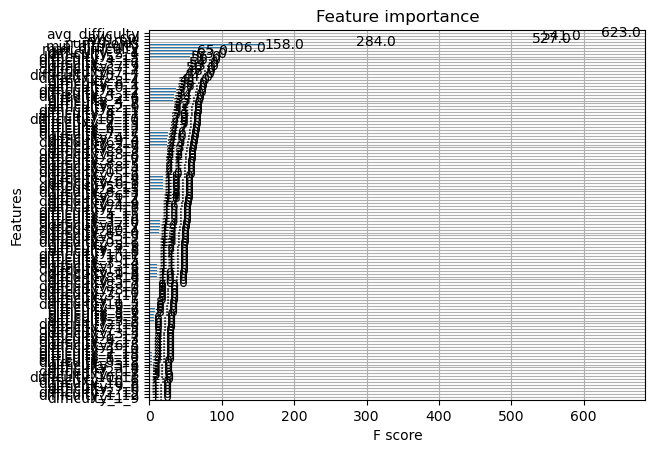

In [87]:
# Plot feature importances
xgboost.plot_importance(model)
plt.show()

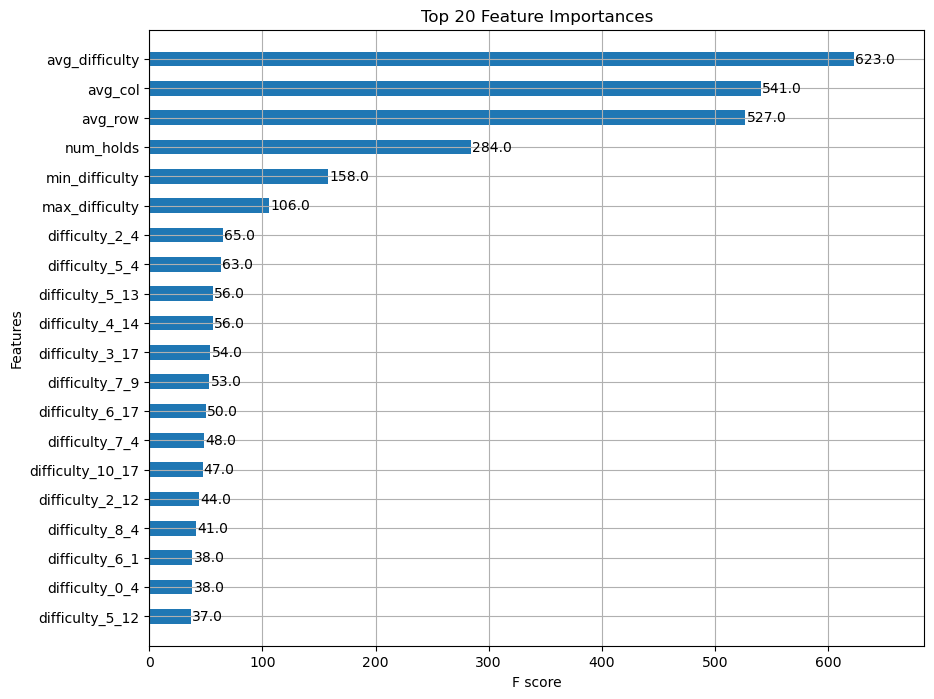

In [88]:
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the figure size for better readability
xgboost.plot_importance(model, max_num_features=20, height=0.5, ax=ax, importance_type='weight')
plt.title('Top 20 Feature Importances')
plt.show()

### Evaluating the feature importance chart

Predominant Features: The chart indicates that the average difficulty (avg_difficulty), average column (avg_col), and average row (avg_row) are the most influential features for predicting the difficulty of a bouldering problem. This suggests that the overall difficulty level of the holds and their average positions play a significant role in the classification model.

Significant Holds: Several difficulty_X_Y features are among the top features, which means that holds in these specific positions are particularly important in determining the difficulty of a boulder problem.

Difficulty Variability: The presence of multiple difficulty_X_Y features with significant importance scores implies that the difficulty of a problem is not solely dependent on a few holds but a variety of holds across the wall. Each of these holds contributes to the problem's difficulty in a quantifiable way.

Non-linear Relationships: The model might be capturing non-linear relationships between hold positions and the overall problem difficulty. This is indicated by the distribution of important holds across different rows and columns rather than clustering around a single area.

### Plotting most important holds for prediction

### Extracting hold position from feature name

In [89]:
def extract_positions_from_features(feature_names):
    positions = []
    for feature in feature_names:
        if feature.startswith('difficulty_'):
            _, x, y = feature.split('_')
            positions.append((int(x), int(y)))
    return positions

### Declaring the important features

In [90]:
feature_importances = ['difficulty_2_4', 'difficulty_5_4', 'difficulty_5_13', 'difficulty_4_14', 'difficulty_3_17', 'difficulty_7_9', 'difficulty_6_17', 'difficulty_7_4', 'difficulty_10_17']  # etc.
important_positions = extract_positions_from_features(feature_importances)

###  Create a heatmap function using only the important hold positions

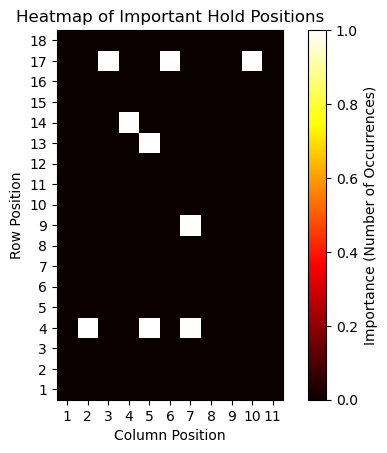

In [94]:
def create_heatmap_for_important_holds(important_positions, wall_width, wall_height):
    # Initialize an empty matrix for the wall
    heatmap_data = np.zeros((wall_height, wall_width))
    
    # Fill the heatmap data based on the important positions
    for x, y in important_positions:
        # Account for zero-indexing
        heatmap_data[y - 1, x - 1] += 1
    
    # Plot the heatmap, ensuring that the base of the wall is at the bottom of the plot
    plt.imshow(heatmap_data, cmap='hot', interpolation='nearest', origin='lower')
    plt.colorbar(label='Importance (Number of Occurrences)')
    plt.title(f'Heatmap of Important Hold Positions')
    plt.xlabel('Column Position')
    plt.ylabel('Row Position')
    plt.xticks(ticks=np.arange(wall_width), labels=np.arange(1, wall_width+1))
    plt.yticks(ticks=np.arange(wall_height), labels=np.arange(1, wall_height+1))
    plt.show()

wall_width = 11  # The number of columns
wall_height = 18  # The number of rows


create_heatmap_for_important_holds(important_positions, wall_width, wall_height)

### Evaluting the hold importances of the XGBoost model

Hold Position Distribution: The heatmap visualization shows a distribution of important holds across the wall, with some areas denser than others. It seems that certain columns and rows are more critical in the climbing route set.

Vertical Challenges: If the heatmap shows a concentration of important holds in the higher rows, it could suggest that holds positioned higher on the wall are more indicative of difficulty, potentially due to the added challenge of reaching and securing these holds.

Lateral Movement: If there's a spread across columns, it could imply that lateral movement or reach is a significant factor in the route's difficulty.

Route Complexity: If important holds are scattered throughout the wall rather than concentrated in one vertical line, it might imply that routes requiring more complex movements are deemed more difficult.

Strategic Hold Placement: For route setters, understanding which hold positions most influence difficulty could help in designing routes that meet specific difficulty levels intentionally.

# is it worth having confusion matrix on logistic regression to visualise how its making predictions

# what grade groups make up the test set is there a spread of grades in the test set 

# why is it overfitting so much in the xgboost model

# how many samples in the training sets 